In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [2]:
df_wine = pd.read_csv('C:\\Users\\Астемир\\Desktop\\ML\\Courses\\coursera\\week4\\Pca\\pca\\winequality-red.csv', sep=';')

In [3]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df_wine.loc[:, 'quality_cat'] = (df_wine.quality > 5).astype(int)
df_wine = df_wine.drop('quality', axis=1)

In [5]:
X = df_wine.iloc[:, :-1].values
y = df_wine.iloc[:, -1].values

In [6]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## PCA разными способами

In [7]:
from sklearn.decomposition import PCA

### Через sklearn

In [8]:
pca = PCA(n_components=6)

In [9]:
pca.fit(X)

PCA(n_components=6)

In [10]:
Z = pca.transform(X)

In [11]:
Z.shape

(1599, 6)

In [12]:
pca.components_.shape

(6, 11)

In [13]:
X_ = X - X.mean(axis=0)

In [14]:
X_.dot(pca.components_.T)

array([[-1.32249050e+01, -2.02389981e+00, -1.12682053e+00,
        -3.99233183e-01, -1.08538902e+00, -1.98017553e-01],
       [ 2.20377236e+01,  4.40832155e+00, -3.10377987e-01,
        -1.99937740e-01, -5.57109394e-01, -3.01324964e-01],
       [ 7.16267333e+00, -2.50146086e+00, -5.81868296e-01,
        -2.19069278e-01, -5.52933551e-01, -2.05113668e-01],
       ...,
       [-3.43135351e+00,  1.42712435e+01, -1.75071927e+00,
         1.74652190e-01,  2.36270522e-01,  8.95128040e-02],
       [ 1.13287834e+00,  1.63161673e+01, -2.13441396e+00,
        -2.35387962e-01, -5.19027681e-01,  1.55484011e-02],
       [-3.87437660e+00,  3.12634754e+00, -1.87414925e+00,
         1.70067390e+00,  1.04329744e-01,  4.00244077e-01]])

In [15]:
Z[:10]

array([[-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902,  -0.19801755],
       [ 22.03772361,   4.40832155,  -0.31037799,  -0.19993774,
         -0.55710939,  -0.30132496],
       [  7.16267333,  -2.50146086,  -0.5818683 ,  -0.21906928,
         -0.55293355,  -0.20511367],
       [ 13.43006283,  -1.95112215,   2.63403954,  -1.5740594 ,
         -0.06380573,   0.08909173],
       [-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902,  -0.19801755],
       [ -6.93400027,  -1.38790176,  -1.12127705,  -0.56009974,
         -1.01986846,  -0.1768873 ],
       [ 12.03682832,  -3.61177553,  -0.67163691,  -1.00390299,
         -0.75505874,  -0.17925554],
       [-25.04255804,   4.72607199,  -1.33781652,  -0.94957702,
         -0.552435  ,  -0.21395213],
       [-29.2756982 ,  -0.47905559,  -0.72624845,  -0.28935942,
         -1.11137314,  -0.10349532],
       [ 54.46316749, -10.99931637,   0.16155938,   3.34519729,
         -0.06094772,   0.1

In [35]:
pca.explained_variance_ratio_

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05])

### Через SVD

In [17]:
from numpy.linalg import svd

In [18]:
u, s, vt = svd(X_)

In [19]:
u.shape

(1599, 1599)

In [20]:
s.shape

(11,)

In [21]:
pca.components_

array([[-6.13247431e-03,  3.84465551e-04,  1.70902595e-04,
         8.64894648e-03,  6.37307290e-05,  2.18857434e-01,
         9.75678369e-01,  3.72498542e-06, -2.68008619e-04,
         2.23381730e-04, -6.35846721e-03],
       [-2.38994985e-02, -2.00966661e-03, -3.03480788e-03,
         1.11348551e-02, -2.36654751e-04,  9.75265982e-01,
        -2.18916841e-01, -2.49998510e-05,  3.27182194e-03,
         6.18926046e-04,  1.45642451e-02],
       [ 9.53135980e-01, -2.51315387e-02,  7.37082746e-02,
         2.80913620e-01,  2.94578815e-03,  2.08968395e-02,
        -1.52685886e-03,  7.76139600e-04, -5.86305467e-02,
         1.75252442e-02, -4.85991164e-02],
       [-2.65092214e-01,  7.27374987e-03, -9.83215158e-03,
         9.43177990e-01, -6.45262673e-04, -2.11894371e-02,
        -3.97992967e-03,  5.52088341e-05,  2.05779719e-02,
        -7.19926307e-03,  1.97613982e-01],
       [ 9.81476468e-02, -4.11570558e-02,  4.14815020e-02,
        -1.76626862e-01, -9.47985067e-03, -7.86843454e-03,
  

In [22]:
v = vt[:6, :].T

In [23]:
X_.dot(v)

array([[ 1.32249050e+01, -2.02389981e+00,  1.12682053e+00,
         3.99233183e-01,  1.08538902e+00,  1.98017553e-01],
       [-2.20377236e+01,  4.40832155e+00,  3.10377987e-01,
         1.99937740e-01,  5.57109394e-01,  3.01324964e-01],
       [-7.16267333e+00, -2.50146086e+00,  5.81868296e-01,
         2.19069278e-01,  5.52933551e-01,  2.05113668e-01],
       ...,
       [ 3.43135351e+00,  1.42712435e+01,  1.75071927e+00,
        -1.74652190e-01, -2.36270522e-01, -8.95128040e-02],
       [-1.13287834e+00,  1.63161673e+01,  2.13441396e+00,
         2.35387962e-01,  5.19027681e-01, -1.55484011e-02],
       [ 3.87437660e+00,  3.12634754e+00,  1.87414925e+00,
        -1.70067390e+00, -1.04329744e-01, -4.00244077e-01]])

In [24]:
Z[:10]

array([[-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902,  -0.19801755],
       [ 22.03772361,   4.40832155,  -0.31037799,  -0.19993774,
         -0.55710939,  -0.30132496],
       [  7.16267333,  -2.50146086,  -0.5818683 ,  -0.21906928,
         -0.55293355,  -0.20511367],
       [ 13.43006283,  -1.95112215,   2.63403954,  -1.5740594 ,
         -0.06380573,   0.08909173],
       [-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902,  -0.19801755],
       [ -6.93400027,  -1.38790176,  -1.12127705,  -0.56009974,
         -1.01986846,  -0.1768873 ],
       [ 12.03682832,  -3.61177553,  -0.67163691,  -1.00390299,
         -0.75505874,  -0.17925554],
       [-25.04255804,   4.72607199,  -1.33781652,  -0.94957702,
         -0.552435  ,  -0.21395213],
       [-29.2756982 ,  -0.47905559,  -0.72624845,  -0.28935942,
         -1.11137314,  -0.10349532],
       [ 54.46316749, -10.99931637,   0.16155938,   3.34519729,
         -0.06094772,   0.1

### Через eig

In [25]:
from numpy.linalg import eig

In [26]:
C = X_.T.dot(X_)

In [27]:
lamd, W = eig(C)

## Влияние количества компонент на качество

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [29]:
model_baseline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [30]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [31]:
base_score = cross_val_score(model_baseline, X, y, scoring='accuracy', cv=cv).mean()

In [32]:
base_score

0.7398138714733543

In [33]:
k = range(1, 12)
scores = []

for n in k:
    model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n)),
    ('clf', LogisticRegression())
])
    scores.append(cross_val_score(model, X, y, scoring='accuracy', cv=cv).mean())

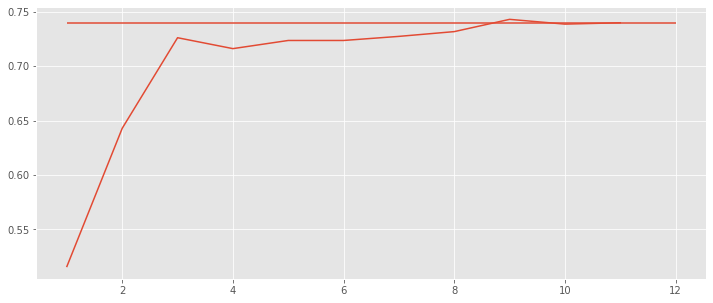

In [34]:
plt.plot(k, scores)
plt.hlines(base_score, 1, 12)